In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import missingno as msn

import os

In [3]:
#CARGAMOS DATASETS
df_esperanza_vida = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/life_expectancy.csv")
df_gasto__salud = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/public_healthcare_spending_share_gdp.csv")
#los nulos de la columna code
df_gasto__salud[df_gasto__salud['Code'].isnull()]
#lista de valores de entity donde code sea nulo
df_gasto__salud[df_gasto__salud['Code'].isnull()]['Entity'].unique()
#lista de valores de entity donde code no sea nulo
df_gasto__salud[df_gasto__salud['Code'].notnull()]['Entity'].unique()
#rango de años
df_gasto__salud['Year'].min(), df_gasto__salud["Year"].max()
#valor máximo y mínimo del %PIB
df_gasto__salud['Domestic general government health expenditure (% of GDP)'].min(), df_gasto__salud["Domestic general government health expenditure (% of GDP)"].max()
#df de los nulos y los no nulos
df_nulos_gasto_salud = df_gasto__salud[df_gasto__salud['Code'].isnull()]
df_no_nulos_gasto_salud = df_gasto__salud[df_gasto__salud['Code'].notnull()]
df_no_nulos_gasto_salud.rename(columns={'Domestic general government health expenditure (% of GDP)': '%PIB'}, inplace=True)
df_agrupado_gasto_salud = df_no_nulos_gasto_salud.groupby(['Entity', 'Code'], as_index=False)['%PIB'].mean()
#creamos quintiles de %PIB
df_agrupado_gasto_salud['Quintil'] = pd.qcut(df_agrupado_gasto_salud['%PIB'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
quintiles, bins = pd.qcut(df_agrupado_gasto_salud['%PIB'], q=5, labels=['Q1','Q2','Q3','Q4','Q5'], retbins=True)
print("Límites de los quintiles:", bins)
#rangos del % de gasto en salud por países
tabla_quintiles = df_agrupado_gasto_salud.groupby('Quintil')['%PIB'].agg(Min='min', Max='max').reset_index().round (2)
tabla_quintiles

Límites de los quintiles: [ 0.34986612  1.45119813  2.12464362  3.29543626  4.99393928 13.47246172]


/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/450763532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nulos_gasto_salud.rename(columns={'Domestic general government health expenditure (% of GDP)': '%PIB'}, inplace=True)
/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/450763532.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla_quintiles = df_agrupado_gasto_salud.groupby('Quintil')['%PIB'].agg(Min='min', Max='max').reset_index().round (2)


,Quintil,Min,Max
0,Q1,0.35,1.45
1,Q2,1.45,2.12
2,Q3,2.14,3.30
3,Q4,3.30,4.99
4,Q5,5.01,13.47


In [4]:
#valores de cada lista de países según quintiles
valores_q1 = df_agrupado_gasto_salud.loc[
    df_agrupado_gasto_salud['Quintil'] == 'Q1',
    'Entity'
].tolist()
# Lista de países a colorear
paises_azules = ['Afghanistan','Armenia','Azerbaijan','Bangladesh','Benin','Cambodia',
 'Cameroon','Central African Republic','Chad','Comoros','Congo',"Cote d'Ivoire",
 'Democratic Republic of Congo','Equatorial Guinea','Eritrea','Ethiopia','Gambia',
 'Guinea','Haiti','India','Indonesia','Laos','Liberia','Mali','Mauritania',
 'Mozambique','Myanmar','Nepal','Niger','Nigeria','Pakistan','Philippines','Senegal',
 'Sierra Leone','Singapore','South Sudan','Tajikistan','Togo','Uganda']
valores_q2 = df_agrupado_gasto_salud.loc[
    df_agrupado_gasto_salud['Quintil'] == 'Q2',
    'Entity'
].tolist()
# Lista de países a colorear en verde
paises_verdes = [
    'Angola', 'Brunei', 'Burkina Faso', 'China', 'Djibouti', 'Dominican Republic',
    'Egypt', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Guinea-Bissau', 'Guyana',
    'Iraq', 'Kazakhstan', 'Kenya', 'Madagascar', 'Malawi', 'Malaysia', 'Mauritius',
    'Monaco', 'Morocco', 'Papua New Guinea', 'Qatar', 'Rwanda', 'Saint Kitts and Nevis',
    'Saint Lucia', 'Sri Lanka', 'Sudan', 'Syria', 'Tanzania', 'Turkmenistan',
    'United Arab Emirates', 'Vanuatu', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']
valores_q3 = df_agrupado_gasto_salud.loc[
    df_agrupado_gasto_salud['Quintil'] == 'Q3',
    'Entity'].tolist()
    # Lista de países a colorear en rojo
paises_rojos = ['Albania',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Bhutan',
 'Burundi',
 'Cape Verde',
 'Cyprus',
 'Dominica',
 'East Timor',
 'Ecuador',
 'Fiji',
 'Grenada',
 'Honduras',
 'Iran',
 'Jamaica',
 'Kuwait',
 'Kyrgyzstan',
 'Libya',
 'Mexico',
 'Micronesia (country)',
 'Mongolia',
 'Oman',
 'Paraguay',
 'Peru',
 'Russia',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'South Korea',
 'Suriname',
 'Switzerland',
 'Thailand',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Uzbekistan',
 'Venezuela']

valores_q4 = df_agrupado_gasto_salud.loc[
    df_agrupado_gasto_salud['Quintil'] == 'Q4',
    'Entity'].tolist()
# Lista de países a colorear en morado
paises_morados = ['Algeria',
 'Andorra',
 'Barbados',
 'Belarus',
 'Belize',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Chile',
 'Colombia',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Hungary',
 'Israel',
 'Jordan',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Lithuania',
 'Maldives',
 'Moldova',
 'Namibia',
 'Nicaragua',
 'North Macedonia',
 'Palau',
 'Panama',
 'Poland',
 'Romania',
 'Samoa',
 'San Marino',
 'Seychelles',
 'Solomon Islands',
 'South Africa',
 'Turkey',
 'Ukraine',
 'Uruguay']

valores_q5 = df_agrupado_gasto_salud.loc[
    df_agrupado_gasto_salud['Quintil'] == 'Q5',
    'Entity'].tolist()
# Lista de países a colorear en morado
paises_negros = ['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Bosnia and Herzegovina',
 'Canada',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Czechia',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kiribati',
 'Luxembourg',
 'Malta',
 'Marshall Islands',
 'Montenegro',
 'Nauru',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Tuvalu',
 'United Kingdom',
 'United States',
 'World']

# Crear DataFrame (tu código original)
df_map = pd.DataFrame({
    'country': paises_azules + paises_verdes + paises_rojos + paises_morados + paises_negros,
    'color': (['Azul (0.35-1.45)']*len(paises_azules)) +
             (['Verde (1.45-2.12)']*len(paises_verdes)) +
             (['Rojo (2.14-3.30)']*len(paises_rojos)) +
             (['Violeta (3.30-4.99)']*len(paises_morados)) +
             (['Negro (5.01-13.47)']*len(paises_negros))
})

# Crear mapa
fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="color",
    color_discrete_map={
        'Azul (0.35-1.45)': 'blue',
        'Verde (1.45-2.12)': 'green',
        'Rojo (2.14-3.30)': 'red',
        'Violeta (3.30-4.99)': 'violet',
        'Negro (5.01-13.47)': 'black'
    },
    projection="natural earth",
    title="Países distribuidos según su %PIB en gasto de salud"
)

# Ampliar y centrar
fig.update_layout(width=1400, height=800)
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="lightgrey",
    projection_scale=1.2,
    center={"lat": 0, "lon": 0}
)

fig.show()

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2690991390.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



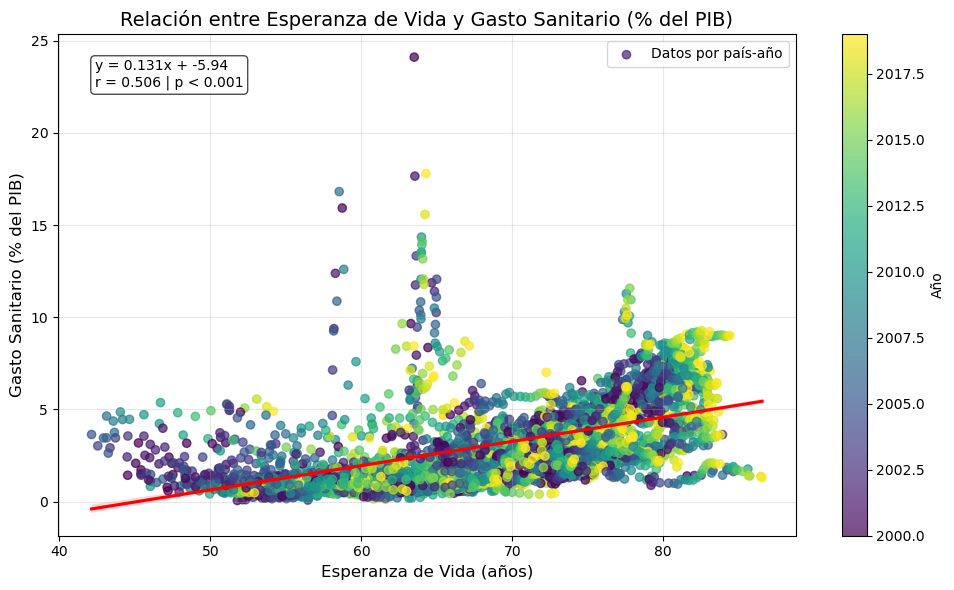

In [5]:
#cargamos datos dt esperanza de vida + merge de DF
df_esperanza_vida[df_esperanza_vida['Code'].isnull()]
df_esperanza_vida[df_esperanza_vida['Code'].isnull()]['Entity'].unique()
df_esperanza_vida[df_esperanza_vida['Code'].notnull()]['Entity'].unique()
df_nulos_esperanza_vida = df_esperanza_vida[df_esperanza_vida['Code'].isnull()]
df_no_nulos_esperanza_vida = df_esperanza_vida[df_esperanza_vida['Code'].notnull()]
df_filtrado_esperanza_vida = df_no_nulos_esperanza_vida[(df_no_nulos_esperanza_vida['Year'] >= 2000) & (df_no_nulos_esperanza_vida['Year'] <= 2019)]
df_filtrado_esperanza_vida.rename(columns={'Period life expectancy at birth - Sex: all - Age: 0': 'Esperanza_vida'}, inplace=True)
df_merged = df_no_nulos_gasto_salud.merge(df_filtrado_esperanza_vida, on=['Entity', 'Code', 'Year'], how='left')

# 1️⃣ Agrupar por país y código, sacar la media de ambas columnas
df_final = (
    df_merged
    .groupby(['Entity', 'Code'], as_index=False)
    .agg({'%PIB': 'mean', 'Esperanza_vida': 'mean'})
)

from scipy.stats import pearsonr
from scipy.stats import linregress
# Calcular regresión lineal (para mostrar la ecuación)
x = df_merged["Esperanza_vida"].dropna()
y = df_merged.loc[x.index, "%PIB"]
slope, intercept, r_value, p_value, _ = linregress(x, y)

plt.figure(figsize=(10,6))

# Dispersión con color por año
scatter = plt.scatter(
    df_merged["Esperanza_vida"],
    df_merged["%PIB"],
    c=df_merged["Year"],
    cmap="viridis",
    alpha=0.7,
    label="Datos por país-año"
)

# Línea de tendencia
sns.regplot(
    x="Esperanza_vida",
    y="%PIB",
    data=df_merged,
    scatter=False,
    color="red",
    line_kws={"label":f"Tendencia lineal (r = {r_value:.3f})"}
)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label("Año")

# Etiquetas y título
plt.title("Relación entre Esperanza de Vida y Gasto Sanitario (% del PIB)", fontsize=14)
plt.xlabel("Esperanza de Vida (años)", fontsize=12)
plt.ylabel("Gasto Sanitario (% del PIB)", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Mostrar ecuación en el gráfico
plt.text(
    0.05, 0.95,
    f"y = {slope:.3f}x + {intercept:.2f}\n"
    f"r = {r_value:.3f} | p < 0.001",
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment="top",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7)
)

plt.tight_layout()
plt.show()

In [6]:
#cargar df vacunaciones + renta per capita + enfermedades + merge
df_vacunaciones = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/global_vaccination_coverage.csv")
df_muertes = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/annual_number_of_deaths_by_cause.csv")
df_vacunaciones.rename (columns= {'HepB3 (% of one-year-olds immunized)': 'Hepatitis B'}, inplace=True)
df_vacunaciones.rename (columns= {'Hib3 (% of one-year-olds immunized)': 'Meningitis y neumonia por Hib'}, inplace=True)
df_vacunaciones.rename (columns= {'IPV1 (% of one-year-olds immunized)': 'Poliomelitis 1ªdosis'}, inplace=True)
df_vacunaciones.rename (columns= {'MCV1 (% of one-year-olds immunized)': 'Sarampion'}, inplace= True)
df_vacunaciones.rename (columns= {'PCV3 (% of one-year-olds immunized)': 'Neumonia, meningitis,otitis'}, inplace=True)
df_vacunaciones.rename (columns= {'Pol3 (% of one-year-olds immunized)': 'Poliomelitis 3ªdosis'}, inplace= True)
df_vacunaciones.rename (columns= {'RCV1 (% of one-year-olds immunized)': 'Rubeola'}, inplace=True)
df_vacunaciones.rename (columns= {'RotaC (% of one-year-olds immunized)': 'Grastroenteritis'}, inplace=True)
df_vacunaciones.rename (columns= {'YFV (% of one-year-olds immunized)': 'Fiebre amarilla'}, inplace=True)
df_vacunaciones.rename (columns= {'DTP3 (% of one-year-olds immunized)': 'Difteria,tetanos y tos ferina'}, inplace=True)
df_vacunaciones.rename (columns= {'BCG (% of one-year-olds immunized)': 'Tuberculosis (formas graves como meningitis tuberculosa y tuberculosis miliar)'},inplace=True)
entidades_sin_code = df_vacunaciones[df_vacunaciones['Code'].isnull()]['Entity'].unique()
df_vacunaciones_limpio = df_vacunaciones[~df_vacunaciones['Entity'].isin(entidades_sin_code)]
df_vacunaciones_ok = df_vacunaciones_limpio.drop(columns=["Poliomelitis 1ªdosis", "Sarampion", "Poliomelitis 3ªdosis", "Rubeola", "Fiebre amarilla", "Difteria,tetanos y tos ferina"])
df_vacunaciones_agrupado= df_vacunaciones_ok[(df_vacunaciones_ok['Year'] >= 2000) & (df_vacunaciones_ok['Year'] <= 2019)]
df_renta_per_capita = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/gdp_per_capita_penn_world_table.csv")
df_renta_per_capita.rename(columns= {"GDP per capita (output, multiple price benchmarks)": "Renta per capita" }, inplace= True)
df_filtrado = df_renta_per_capita[(df_renta_per_capita['Year'] >= 2000) & (df_renta_per_capita['Year'] <= 2019)]
df_agrupado_renta_per_capita = df_filtrado.groupby(['Entity', 'Code'], as_index=False)['Renta per capita'].mean()
df_agrupado_renta_per_capita['Quintil Renta'] = pd.qcut(df_agrupado_renta_per_capita['Renta per capita'], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
df_agrupado_renta_per_capita
df_merged2 = pd.merge(df_agrupado_renta_per_capita, df_agrupado_gasto_salud, on=['Entity', 'Code'], how='outer')
df_merged3= pd.merge(df_merged2, df_vacunaciones_agrupado, on= ["Entity", "Code"], how= "outer")
df_merged2_esperanza_vida= pd.merge(df_merged3, df_filtrado_esperanza_vida, on= ["Entity", "Code", "Year"], how= "outer")
df_enfermedades = pd.read_csv("/Users/rocioromerosanchez/Desktop/DATA ANALYSIS/TFM/annual_number_of_deaths_by_cause.csv")
df_enfermedades_sin_nulos= df_enfermedades[df_enfermedades['Code'].notnull()]
df_filtrado_enfermedades = df_enfermedades_sin_nulos[["Entity", "Code", "Year", "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)", "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)", "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)", "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)", "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)", "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)"]]
df_filtrado_enfermedades.rename(columns={"Deaths - Meningitis - Sex: Both - Age: All Ages (Number)": "Meningitis"},inplace=True)
df_filtrado_enfermedades.rename(columns={"Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)": "Tuberculosis"}, inplace=True)
df_filtrado_enfermedades.rename(columns={"Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)": "Infecciones respiratorias bajas"},inplace=True)
df_filtrado_enfermedades.rename(columns={"Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)":"Diarrea"},inplace=True)
df_filtrado_enfermedades.rename(columns={"Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)":"Cirrosis y otras enf hepaticas"},inplace=True)
df_filtrado_enfermedades.rename(columns={"Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)": "Hepatitis aguda"} ,inplace=True)
df_enfermedad_rango = df_filtrado_enfermedades[(df_filtrado_enfermedades['Year'] >= 2000) & (df_filtrado_enfermedades['Year'] <= 2019)]
df_merged_4 = pd.merge(df_merged2_esperanza_vida, df_enfermedad_rango, on= ["Entity", "Code", "Year"], how="outer")
df_merged_4


/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1970882148.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1970882148.py:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1970882148.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipy

,Entity,Code,Renta per capita,Quintil Renta,%PIB,Quintil,Year,Tuberculosis (formas graves como meningitis tuberculosa y tuberculosis miliar),Hepatitis B,Meningitis y neumonia por Hib,"Neumonia, meningitis,otitis",Grastroenteritis,Esperanza_vida,Meningitis,Tuberculosis,Infecciones respiratorias bajas,Diarrea,Cirrosis y otras enf hepaticas,Hepatitis aguda
0,Afghanistan,AFG,NaN,NaN,0.535133,Q1,2000.0,30.0,NaN,NaN,NaN,NaN,55.2978,3105.0,5864.0,32395.0,11323.0,3249.0,4334.0
1,Afghanistan,AFG,NaN,NaN,0.535133,Q1,2001.0,43.0,NaN,NaN,NaN,NaN,55.7981,3063.0,5900.0,31594.0,11446.0,3267.0,4363.0
2,Afghanistan,AFG,NaN,NaN,0.535133,Q1,2002.0,46.0,NaN,NaN,NaN,NaN,56.4538,2990.0,5660.0,30346.0,11393.0,3238.0,4251.0
3,Afghanistan,AFG,NaN,NaN,0.535133,Q1,2003.0,44.0,NaN,NaN,NaN,NaN,57.3445,3300.0,5676.0,32361.0,12348.0,3342.0,4373.0
4,Afghanistan,AFG,NaN,NaN,0.535133,Q1,2004.0,51.0,NaN,NaN,NaN,NaN,57.9436,3350.0,5607.0,32222.0,12258.0,3394.0,4345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,Zimbabwe,ZWE,2534.84548,Q1,2.089709,Q2,2015.0,90.0,87.0,87.0,87.0,87.0,59.5911,1439.0,11214.0,12974.0,5102.0,1956.0,146.0
4747,Zimbabwe,ZWE,2534.84548,Q1,2.089709,Q2,2016.0,95.0,90.0,90.0,90.0,91.0,60.3059,1457.0,10998.0,13024.0,5002.0,1962.0,146.0
4748,Zimbabwe,ZWE,2534.84548,Q1,2.089709,Q2,2017.0,95.0,89.0,89.0,89.0,91.0,60.7095,1460.0,10762.0,12961.0,4948.0,2007.0,144.0
4749,Zimbabwe,ZWE,2534.84548,Q1,2.089709,Q2,2018.0,95.0,89.0,89.0,89.0,90.0,61.4141,1450.0,10545.0,12860.0,4745.0,2030.0,139.0


/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1924938758.py:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



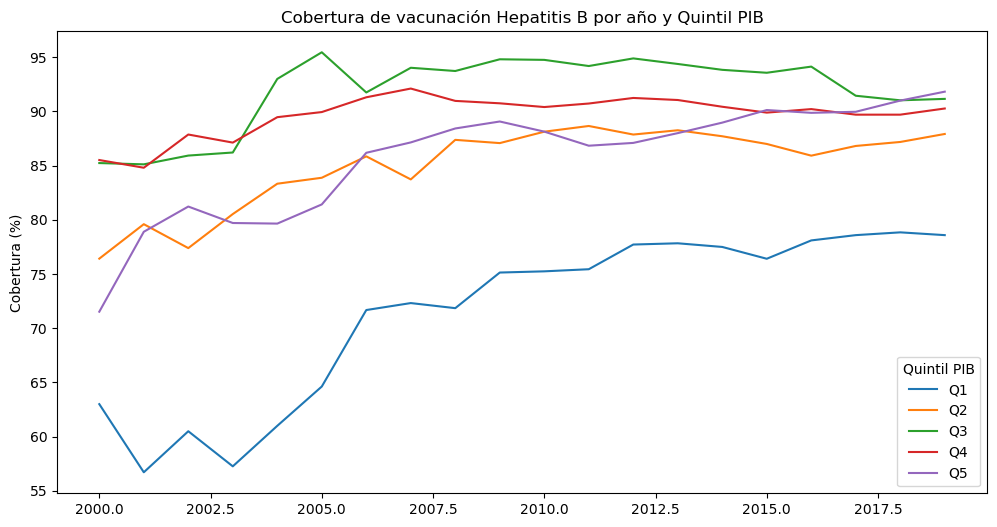

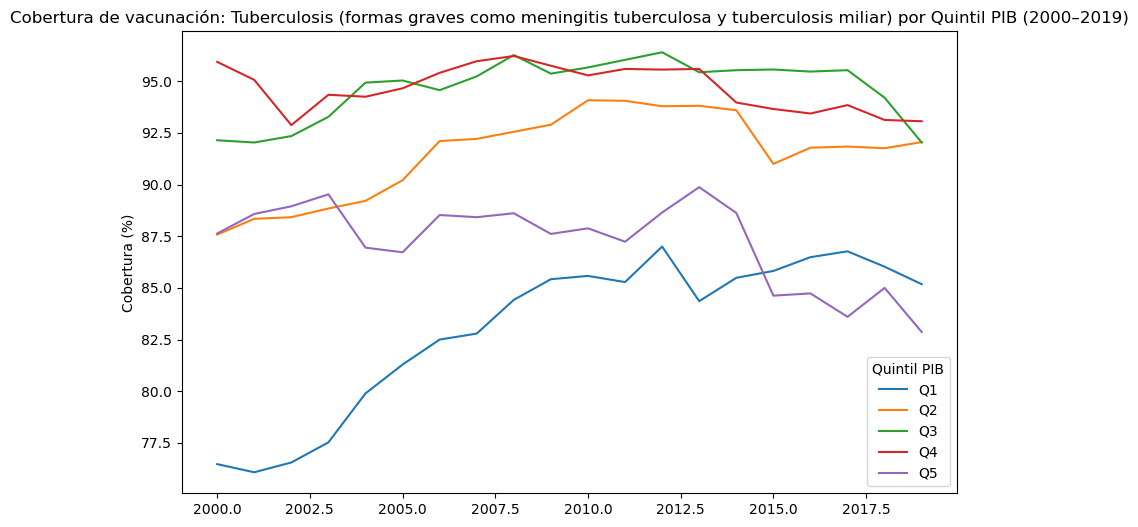

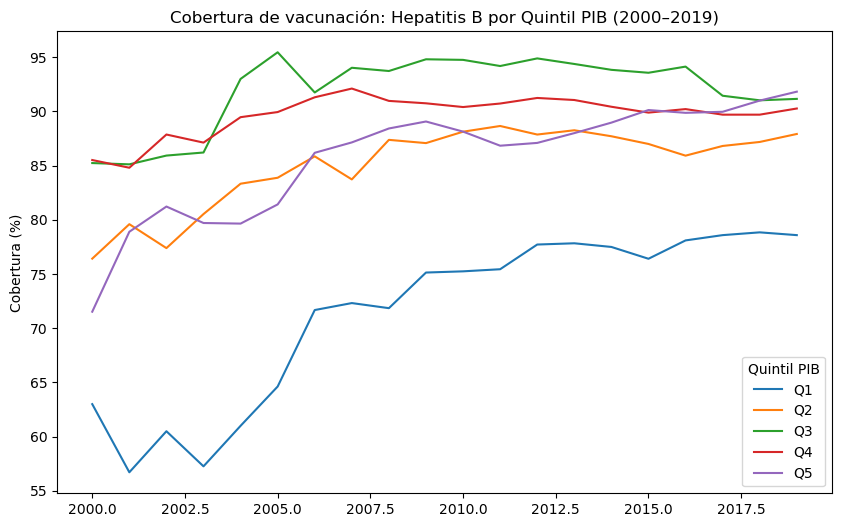

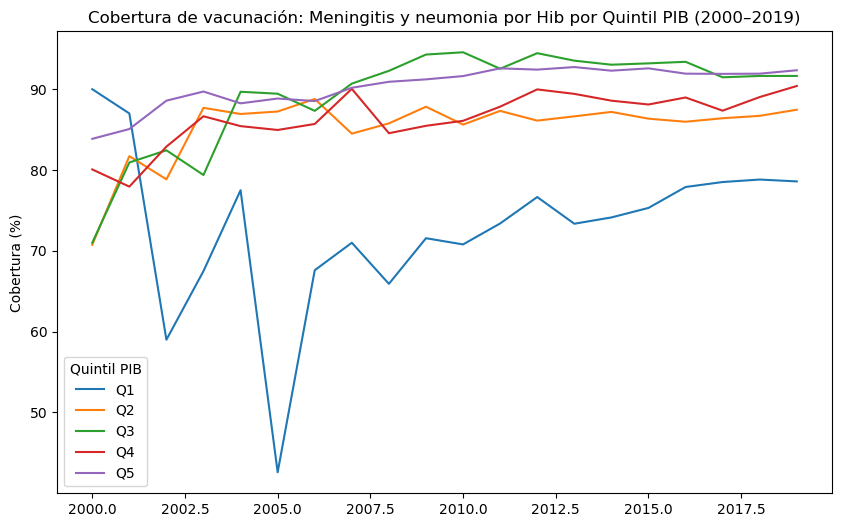

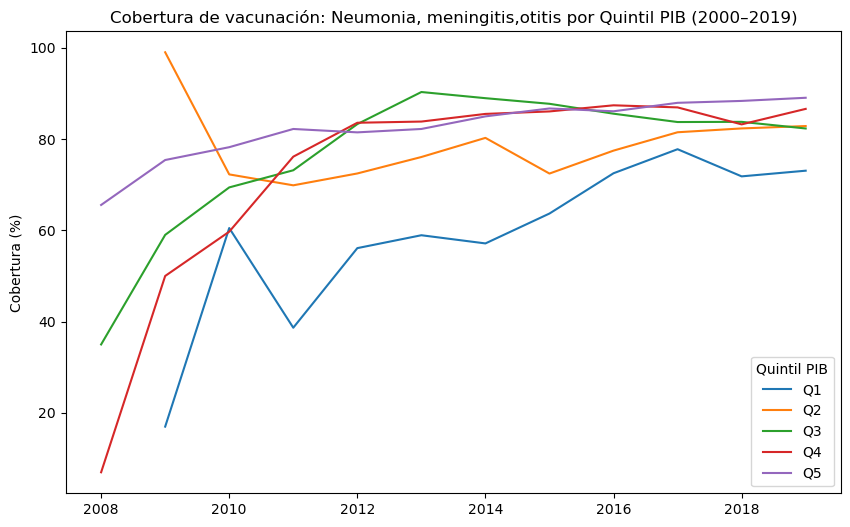

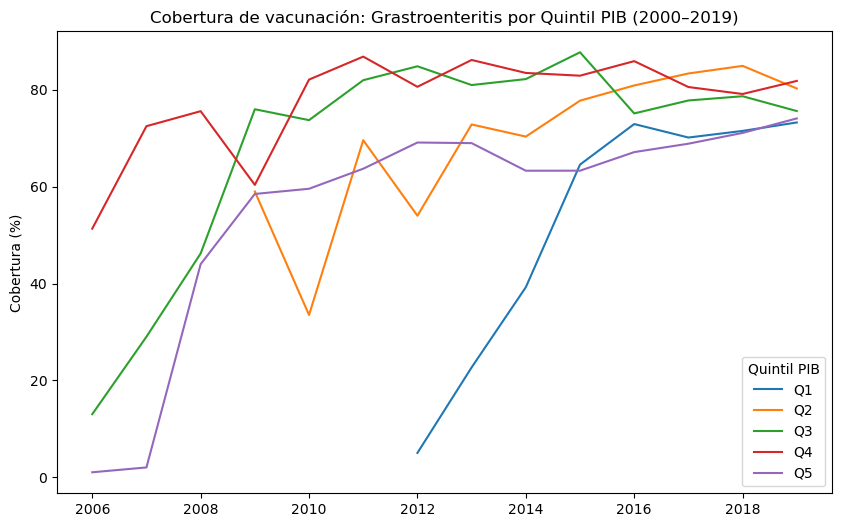

In [7]:
#pintamos gráficos para las vacunas
#Evolución de la cobertura vacunal por año y quintil
vacunas = [
    "Tuberculosis (formas graves como meningitis tuberculosa y tuberculosis miliar)",
    "Hepatitis B",
    "Meningitis y neumonia por Hib",
    "Neumonia, meningitis,otitis",
    "Grastroenteritis"
]

# Media por año y quintil de PIB
df_anual_pib = df_merged_4.groupby(["Year", "Quintil"])[vacunas].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(12,6))
for quintil in df_anual_pib["Quintil"].unique():
    subset = df_anual_pib[df_anual_pib["Quintil"] == quintil]
    plt.plot(subset["Year"], subset["Hepatitis B"], label=f"{quintil}")

plt.title("Cobertura de vacunación Hepatitis B por año y Quintil PIB")
plt.ylabel("Cobertura (%)")
plt.legend(title="Quintil PIB")
plt.show()
for vacuna in vacunas:
    plt.figure(figsize=(10,6))
    for quintil in df_anual_pib["Quintil"].unique():
        subset = df_anual_pib[df_anual_pib["Quintil"] == quintil]
        plt.plot(subset["Year"], subset[vacuna], label=quintil)
    plt.title(f"Cobertura de vacunación: {vacuna} por Quintil PIB (2000–2019)")
    plt.ylabel("Cobertura (%)")
    plt.legend(title="Quintil PIB")
    plt.show()

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1025249914.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



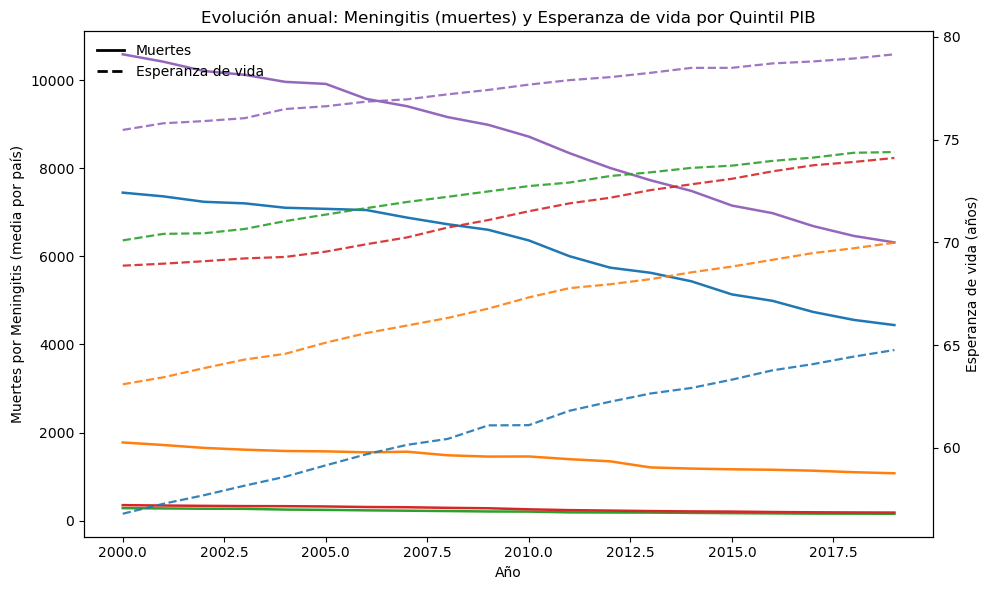

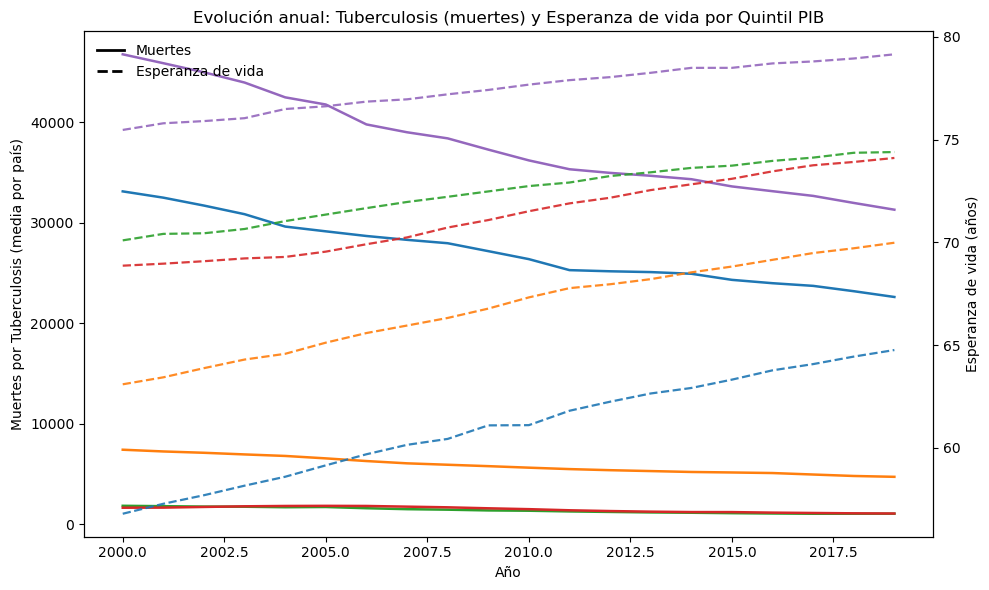

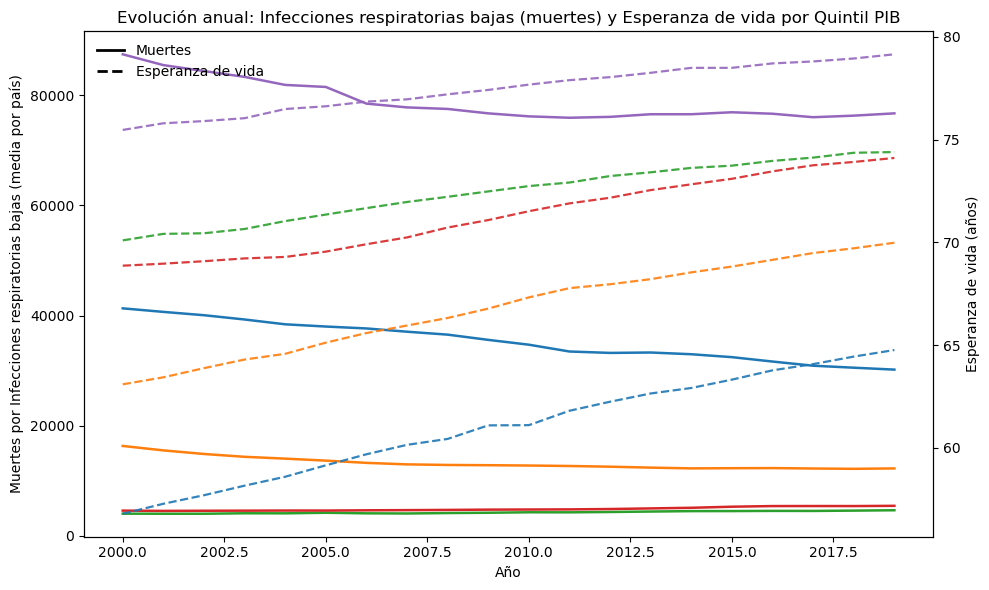

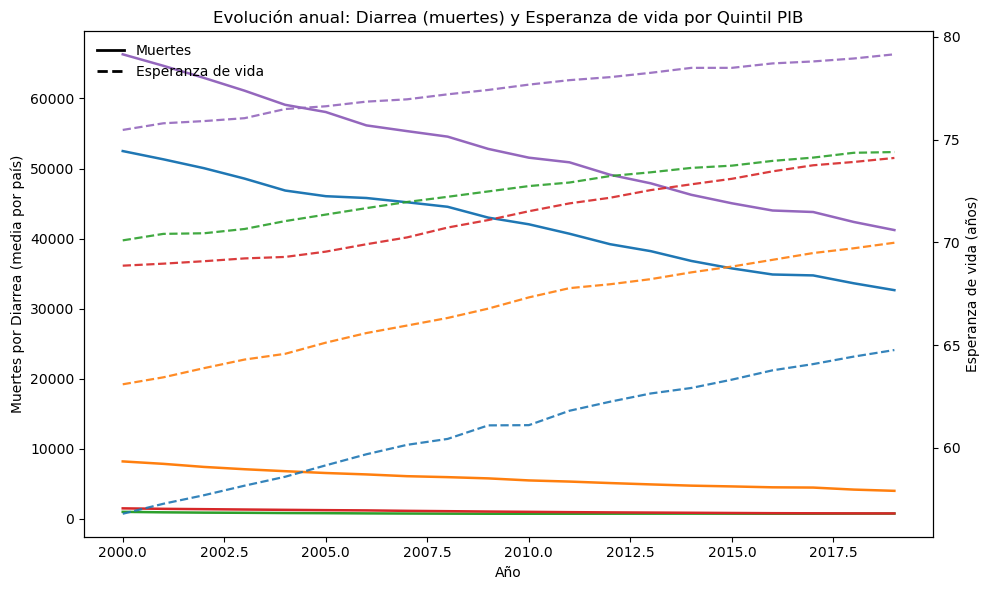

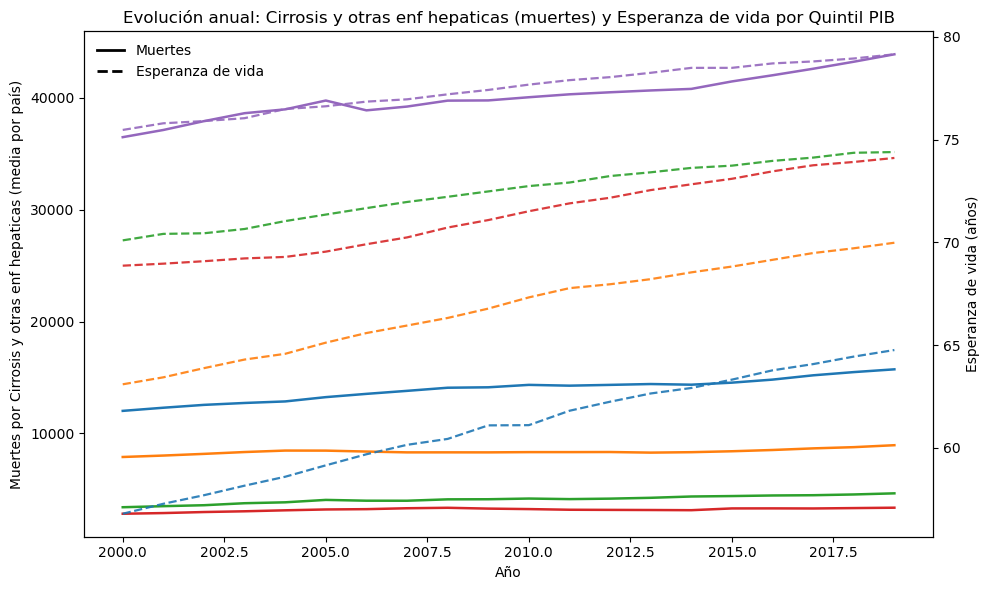

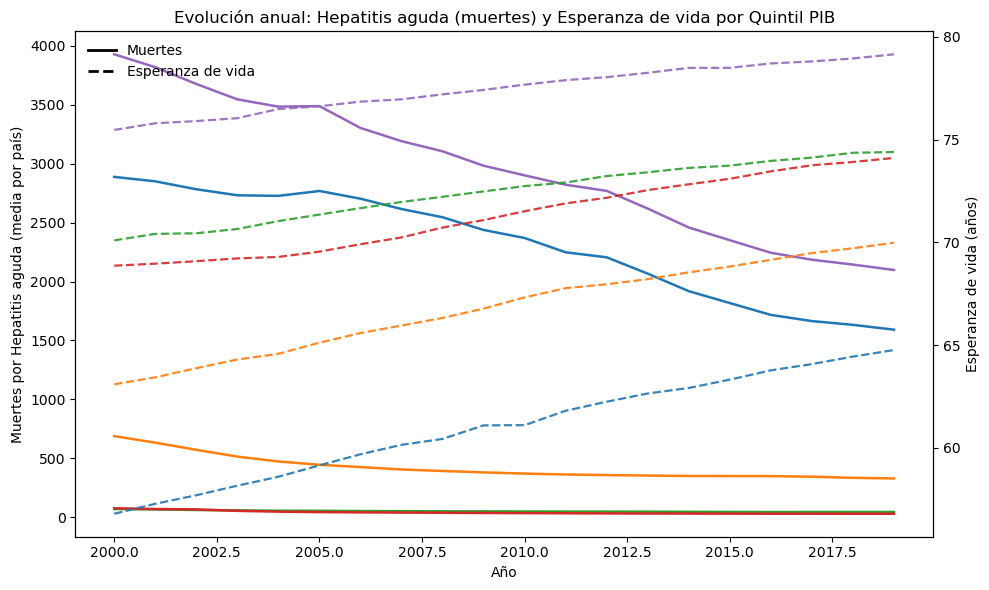

In [8]:
#gráficos de la evolución de las enfermedades y esperanza de vida por quintil
from matplotlib.lines import Line2D
# --- Configuración ---
enfermedades = [
    "Meningitis",
    "Tuberculosis",
    "Infecciones respiratorias bajas",
    "Diarrea",
    "Cirrosis y otras enf hepaticas",
    "Hepatitis aguda",
]
orden_quintil = ["Q1","Q2","Q3","Q4","Q5"]

# Filtrar 2000–2019 y ordenar quintiles
df = df_merged_4[df_merged_4["Year"].between(2000, 2019)].copy()
df["Quintil"] = pd.Categorical(df["Quintil"], categories=orden_quintil, ordered=True)

# Agregar: medias por Año × Quintil PIB para enfermedades y esperanza de vida
agg_cols = enfermedades + ["Esperanza_vida"]
df_anual_q = (
    df.groupby(["Year","Quintil"], as_index=False)[agg_cols]
      .mean(numeric_only=True)
      .sort_values(["Year","Quintil"])
)

# Paleta consistente por quintil (tomamos los colores del ciclo actual)
prop_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_map = {q: prop_cycle[i % len(prop_cycle)] for i, q in enumerate(orden_quintil)}

for enf in enfermedades:
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax2 = ax1.twinx()  # segundo eje para Esperanza de vida

    # --- Muertes (línea continua) por quintil ---
    for q in orden_quintil:
        sub = df_anual_q[df_anual_q["Quintil"] == q]
        ax1.plot(
            sub["Year"], sub[enf],
            label=f"{q} — {enf}",
            color=color_map[q],
            linewidth=1.8
        )

    # --- Esperanza de vida (línea discontinua) por quintil ---
    for q in orden_quintil:
        sub = df_anual_q[df_anual_q["Quintil"] == q]
        ax2.plot(
            sub["Year"], sub["Esperanza_vida"],
            linestyle="--",
            color=color_map[q],
            linewidth=1.6,
            alpha=0.9
        )

    # Títulos y ejes
    ax1.set_title(f"Evolución anual: {enf} (muertes) y Esperanza de vida por Quintil PIB")
    ax1.set_xlabel("Año")
    ax1.set_ylabel(f"Muertes por {enf} (media por país)")
    ax2.set_ylabel("Esperanza de vida (años)")

    # Opcional: límites para facilitar lectura
    # ax2.set_ylim(50, 90)   # ajusta si lo necesitas
    # Si alguna serie de muertes es muy grande, puedes usar escala log:
    # ax1.set_yscale("log")

    # Leyendas: 1) colores = quintiles, 2) estilos = métrica
    handles_quintil = [Line2D([0],[0], color=color_map[q], lw=2, label=q) for q in orden_quintil]
    legend_quintil = ax1.legend(
        handles=handles_quintil, title="Quintil PIB",
        loc="upper center", bbox_to_anchor=(0.5, -0.12), ncol=5, frameon=False
    )
    ax1.add_artist(legend_quintil)

    handles_tipo = [
        Line2D([0],[0], color="black", lw=2, linestyle="-", label="Muertes"),
        Line2D([0],[0], color="black", lw=2, linestyle="--", label="Esperanza de vida"),
    ]
    ax1.legend(handles=handles_tipo, loc="upper left", frameon=False)

    fig.tight_layout()
    plt.show()

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



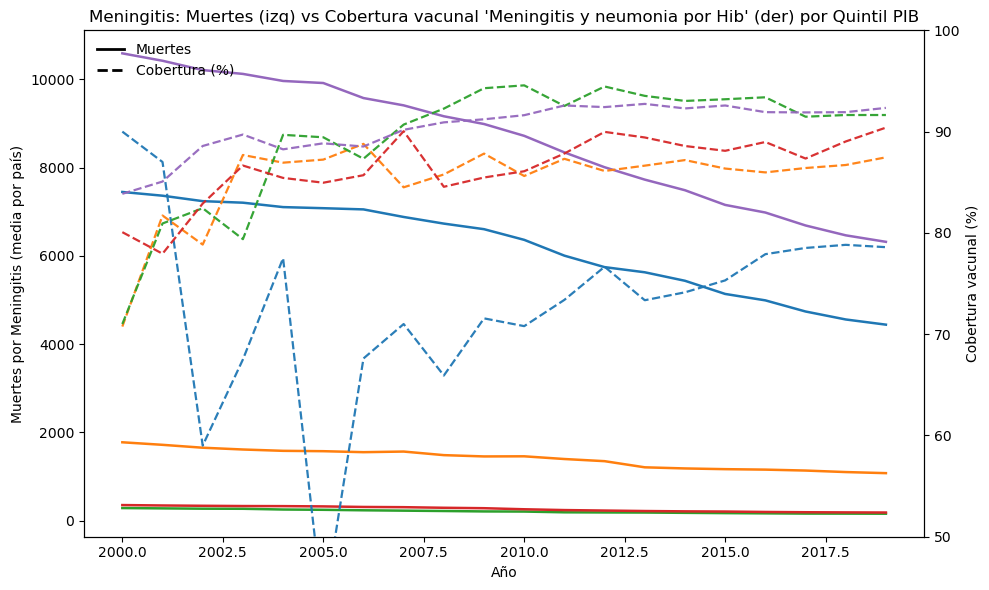

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



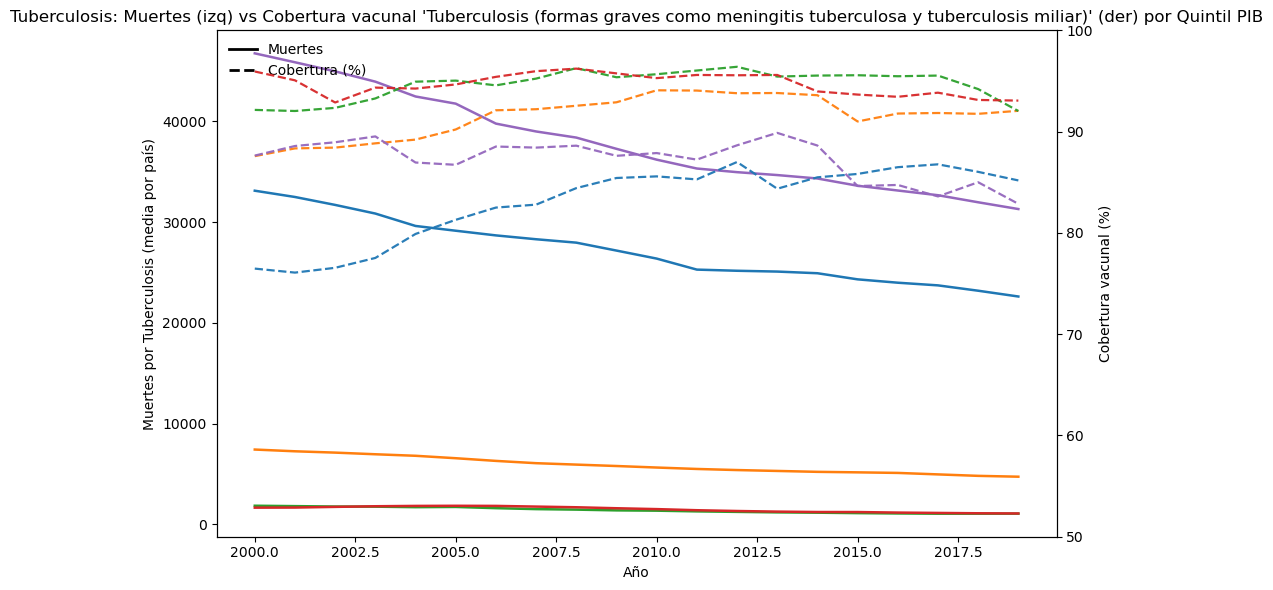

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



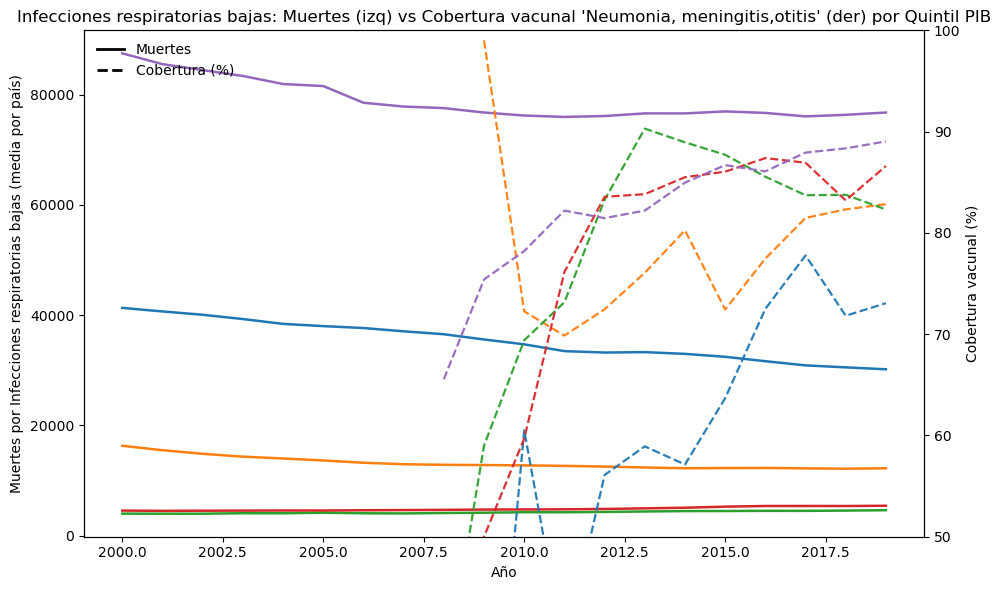

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



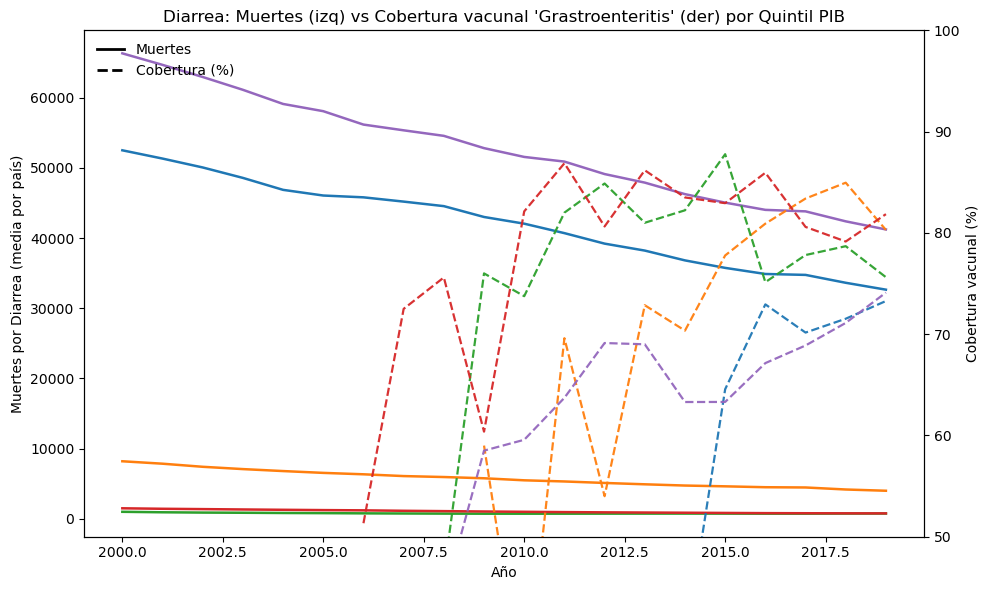

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



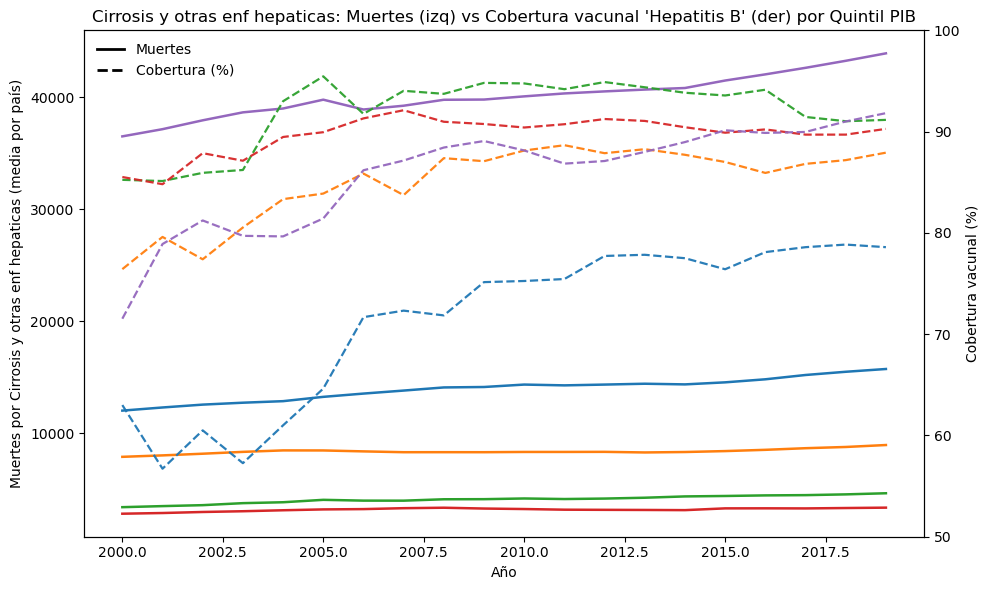

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/2889359914.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



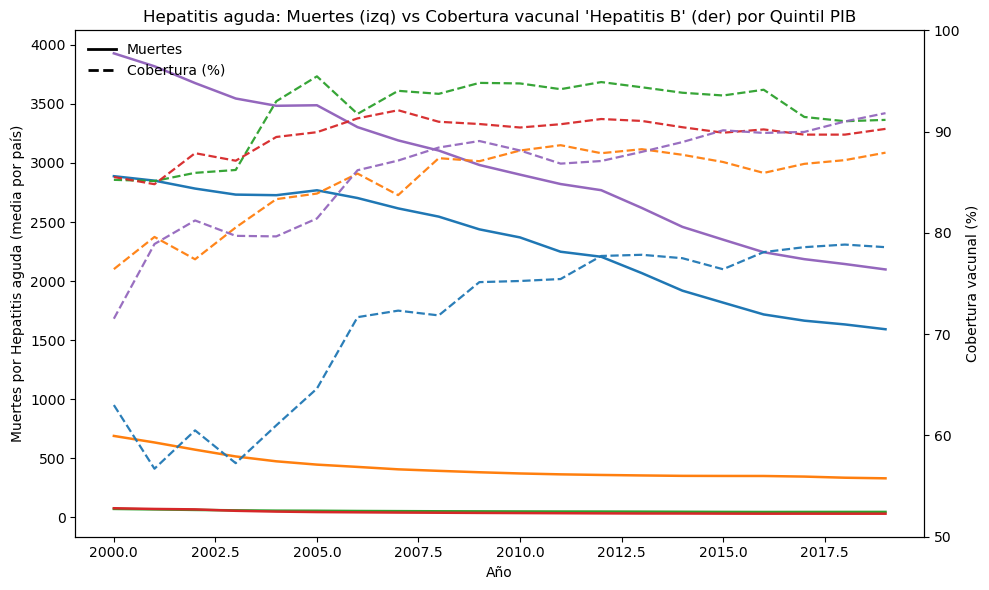

In [9]:
#gráficos de muertes por enfermedad y cobertura vacunal
# === Parámetros ===
enfermedades = [
    "Meningitis",
    "Tuberculosis",
    "Infecciones respiratorias bajas",
    "Diarrea",
    "Cirrosis y otras enf hepaticas",
    "Hepatitis aguda",
]
# Mapeo enfermedad -> vacuna asociada (ajústalo si quieres)
map_enf_a_vac = {
    "Meningitis": "Meningitis y neumonia por Hib",  # (podrías usar PCV si prefieres neumococo)
    "Tuberculosis": "Tuberculosis (formas graves como meningitis tuberculosa y tuberculosis miliar)",  # BCG
    "Infecciones respiratorias bajas": "Neumonia, meningitis,otitis",  # neumococo (± Hib)
    "Diarrea": "Grastroenteritis",  # rotavirus (usa el label exacto de tu df)
    "Cirrosis y otras enf hepaticas": "Hepatitis B",
    "Hepatitis aguda": "Hepatitis B",
}
orden_quintil = ["Q1","Q2","Q3","Q4","Q5"]

# === Filtro y orden de quintiles ===
df = df_merged_4[df_merged_4["Year"].between(2000, 2019)].copy()
df["Quintil"] = pd.Categorical(df["Quintil"], categories=orden_quintil, ordered=True)

# === Agregamos medias por Año × Quintil PIB para variables necesarias ===
# (solo calculamos lo que realmente necesitamos por cada enfermedad/vacuna en el bucle)
prop_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_map = {q: prop_cycle[i % len(prop_cycle)] for i, q in enumerate(orden_quintil)}

# === Toggle opcional para el eje de cobertura (por ejemplo, empezar en 50%) ===
limitar_eje_cobertura = True
ymin_cobertura, ymax_cobertura = 50, 100

for enf in enfermedades:
    vac = map_enf_a_vac[enf]
    # columnas presentes?
    if enf not in df.columns or vac not in df.columns:
        print(f"Saltando {enf} -> {vac}: faltan columnas en el DataFrame.")
        continue

    # Agregar medias por año y quintil para ambas métricas
    agg = (df.groupby(["Year","Quintil"], as_index=False)[[enf, vac]]
             .mean(numeric_only=True)
             .sort_values(["Year","Quintil"]))

    fig, ax1 = plt.subplots(figsize=(10,6))
    ax2 = ax1.twinx()

    # Muertes (línea continua) por quintil
    for q in orden_quintil:
        sub = agg[agg["Quintil"] == q]
        ax1.plot(sub["Year"], sub[enf], color=color_map[q], linewidth=1.8, label=q)

    # Cobertura (línea discontinua) por quintil
    for q in orden_quintil:
        sub = agg[agg["Quintil"] == q]
        ax2.plot(sub["Year"], sub[vac], color=color_map[q], linewidth=1.6, linestyle="--", alpha=0.95)

    # Títulos y ejes
    ax1.set_title(f"{enf}: Muertes (izq) vs Cobertura vacunal '{vac}' (der) por Quintil PIB")
    ax1.set_xlabel("Año")
    ax1.set_ylabel(f"Muertes por {enf} (media por país)")
    ax2.set_ylabel("Cobertura vacunal (%)")

    # Opcionales: límites del eje de cobertura
    if limitar_eje_cobertura:
        ax2.set_ylim(ymin_cobertura, ymax_cobertura)

    # Leyendas: 1) colores = quintiles, 2) estilos = métrica
    handles_quintil = [Line2D([0],[0], color=color_map[q], lw=2, label=q) for q in orden_quintil]
    leg_quintil = ax1.legend(handles=handles_quintil, title="Quintil PIB",
                             loc="upper center", bbox_to_anchor=(0.5, -0.12),
                             ncol=5, frameon=False)
    ax1.add_artist(leg_quintil)

    handles_tipo = [
        Line2D([0],[0], color="black", lw=2, linestyle="-", label="Muertes"),
        Line2D([0],[0], color="black", lw=2, linestyle="--", label="Cobertura (%)"),
    ]
    ax1.legend(handles=handles_tipo, loc="upper left", frameon=False)

    fig.tight_layout()
    plt.show()

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/3690965360.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/3690965360.py:59: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/3690965360.py:53: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/s6/vcym3hf90092j5_y0blxx

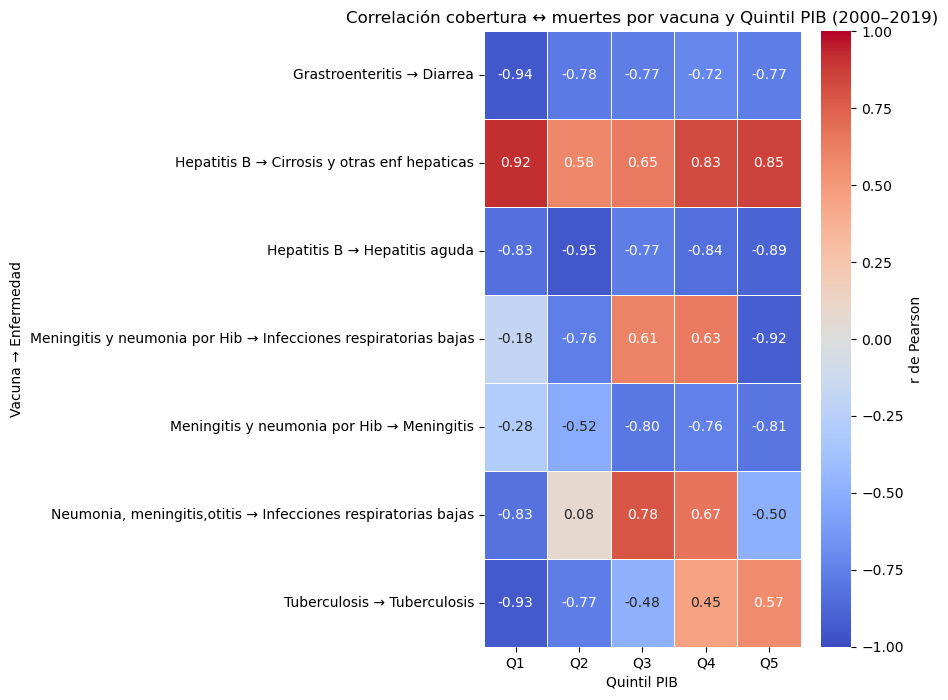

In [10]:
#correlaciones
# 6 relaciones (incluye Hib→Meningitis y Hib→IR bajas por separado)
VAC_ENF_PAIRS = [
    ("Tuberculosis (formas graves como meningitis tuberculosa y tuberculosis miliar)", "Tuberculosis"),
    ("Hepatitis B", "Cirrosis y otras enf hepaticas"),
    ("Meningitis y neumonia por Hib", "Meningitis"),
    ("Neumonia, meningitis,otitis", "Infecciones respiratorias bajas"),
    ("Grastroenteritis", "Diarrea"),
    ("Meningitis y neumonia por Hib", "Infecciones respiratorias bajas"),
    ("Hepatitis B","Hepatitis aguda")
]
def _prep_2000_2019(df):
    d = df[df["Year"].between(2000, 2019)].copy()
    d["Year"] = pd.to_numeric(d["Year"], errors="coerce")
    return d

def corr_global_pairs(df, pairs, agg="mean", lag=0):
    """
    Correlación global por año (promedio mundial) para cada (vacuna, enfermedad).
    Devuelve 1 fila por par (→ 6 filas).
    """
    d = _prep_2000_2019(df)
    out = []
    for vac, enf in pairs:
        if vac not in d.columns or enf not in d.columns:
            out.append({"Vacuna": vac, "Enfermedad": enf, "Lag": lag, "N": 0, "r_Pearson": np.nan, "nota": "columna no encontrada"})
            continue

        tmp = d.groupby("Year", as_index=False)[[vac, enf]].agg(agg).sort_values("Year")
        if lag:
            tmp[vac] = tmp[vac].shift(lag)  # cobertura(t-lag) vs muertes(t)

        sub = tmp[[vac, enf]].dropna()
        r = sub[vac].corr(sub[enf]) if len(sub) >= 3 else np.nan
        out.append({"Vacuna": vac, "Enfermedad": enf, "Lag": lag, "N": len(sub), "r_Pearson": r})
    return pd.DataFrame(out)

def corr_por_grupo_pairs(df, pairs, grupo_col="Quintil PIB", orden=("Q1","Q2","Q3","Q4","Q5"), agg="mean", lag=0):
    """
    Correlación por grupo (p. ej. Quintil PIB) para cada (vacuna, enfermedad).
    Devuelve hasta 6 × nº_grupos filas.
    """
    d = _prep_2000_2019(df)
    if grupo_col in d.columns and orden is not None:
        d[grupo_col] = pd.Categorical(d[grupo_col], categories=list(orden), ordered=True)

    out = []
    for vac, enf in pairs:
        if vac not in d.columns or enf not in d.columns:
            out.append({"Grupo": np.nan, "Vacuna": vac, "Enfermedad": enf, "Lag": lag, "N": 0, "r_Pearson": np.nan, "nota": "columna no encontrada"})
            continue

        agg_df = (d.groupby(["Year", grupo_col], as_index=False)[[vac, enf]]
                    .agg(agg).sort_values(["Year", grupo_col]))

        if lag:
            agg_df[vac] = agg_df.groupby(grupo_col)[vac].shift(lag)

        for g, dd in agg_df.groupby(grupo_col):
            sub = dd[[vac, enf]].dropna()
            r = sub[vac].corr(sub[enf]) if len(sub) >= 3 else np.nan
            out.append({"Grupo": g, "Vacuna": vac, "Enfermedad": enf, "Lag": lag, "N": len(sub), "r_Pearson": r})
    return pd.DataFrame(out)

# Global (promedio por año)
df_corr_global_6 = corr_global_pairs(df_merged_4, VAC_ENF_PAIRS, lag=0)
df_corr_global_6.sort_values(["Vacuna","Enfermedad"])

# Por Quintil PIB
df_corr_quintil_6 = corr_por_grupo_pairs(df_merged_4, VAC_ENF_PAIRS, grupo_col="Quintil", orden=("Q1","Q2","Q3","Q4","Q5"), lag=0)
df_corr_quintil_6.sort_values(["Vacuna","Enfermedad","Grupo"])

# 1) Calcular correlaciones por Quintil PIB para las 6 relaciones
orden_quintil = ("Q1","Q2","Q3","Q4","Q5")
df_corr_quintil_6 = corr_por_grupo_pairs(
    df_merged_4,
    VAC_ENF_PAIRS,
    grupo_col="Quintil",
    orden=orden_quintil,
    lag=0  # cambia a 1 o 2 para probar desfase
)

# 2) Construir etiqueta "Vacuna → Enfermedad" para filas
def etiqueta_par(v, e):
    # opcional: acorta nombres muy largos de vacuna para que quepa mejor
    v_corto = v.split(" (")[0].strip()
    return f"{v_corto} → {e}"

df_corr_quintil_6 = df_corr_quintil_6.copy()
df_corr_quintil_6["par"] = df_corr_quintil_6.apply(lambda r: etiqueta_par(r["Vacuna"], r["Enfermedad"]), axis=1)

# 3) Pivot: filas = par, columnas = Q1..Q5, valores = r_Pearson
pivot = df_corr_quintil_6.pivot_table(
    index="par", columns="Grupo", values="r_Pearson", aggfunc="mean"
).reindex(columns=list(orden_quintil))

# 4) Heatmap (r centrado en 0). En azul = correlación negativa (mejor: más % → menos muertes)
plt.figure(figsize=(9, 5 + 0.3*len(pivot)))
sns.heatmap(
    pivot, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, vmin=-1, vmax=1,
    linewidths=0.5, linecolor="white",
    cbar_kws={"label": "r de Pearson"}
)
plt.title("Correlación cobertura ↔ muertes por vacuna y Quintil PIB (2000–2019)")
plt.xlabel("Quintil PIB")
plt.ylabel("Vacuna → Enfermedad")
plt.tight_layout()
plt.show()

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1739683321.py:54: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/s6/vcym3hf90092j5_y0blxxq6h0000gn/T/ipykernel_18417/1739683321.py:58: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



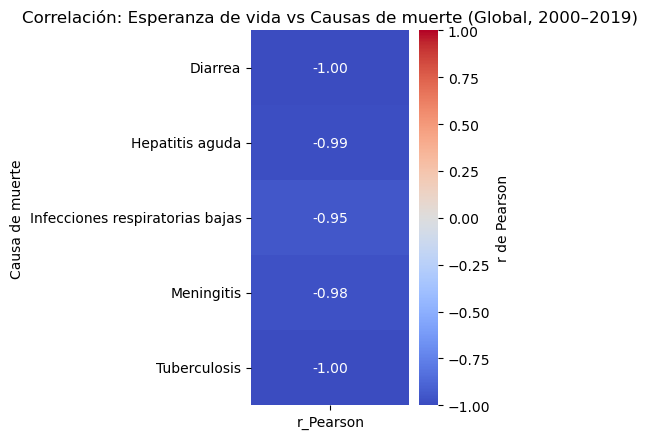

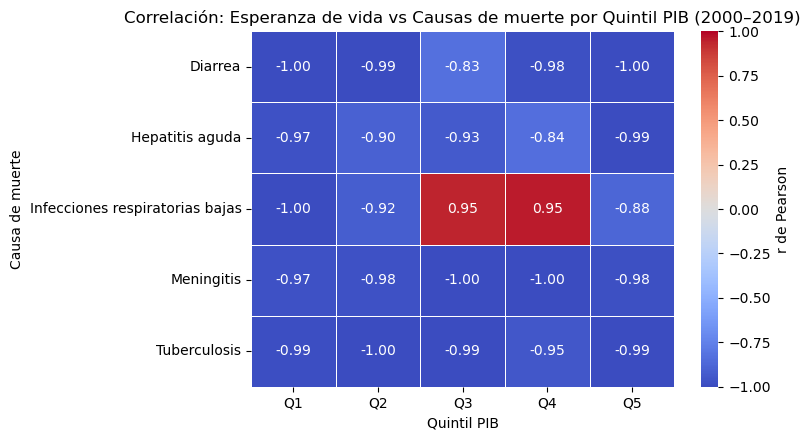

In [11]:
#correlaciones
# ========= 1) Parámetros =========
# Causas de muerte a analizar (ajusta si cambia algún nombre en tus columnas)
causas = [
    "Meningitis",
    "Tuberculosis",
    "Infecciones respiratorias bajas",
    "Diarrea",
    "Cirrosis y otras enf hepáticas",
    "Hepatitis aguda",
]
grupo_col = "Quintil"
orden_quintil = ["Q1","Q2","Q3","Q4","Q5"]

# Filtrar a las columnas que EXISTEN realmente (evita errores si falta alguna)
causas = [c for c in causas if c in df_merged_4.columns]
if "Esperanza_vida" not in df_merged_4.columns:
    raise ValueError("No encuentro la columna 'Esperanza_vida' en df_merged_3.")

# ========= 2) Funciones de ayuda =========
def _prep(df, y0=2000, y1=2019):
    d = df.copy()
    d = d[d["Year"].between(y0, y1)]
    d["Year"] = pd.to_numeric(d["Year"], errors="coerce")
    return d

def correlacion_global_ev_vs_causas(df, causas, agg="mean"):
    """
    Correlación global (por año) entre Esperanza_vida y cada causa de muerte.
    Agrega por 'Year' para obtener una serie anual mundial.
    Devuelve un DataFrame con r de Pearson por causa.
    """
    d = _prep(df)
    cols = ["Esperanza_vida"] + causas
    g = d.groupby("Year", as_index=False)[cols].agg(agg).dropna()
    out = []
    for c in causas:
        sub = g[["Esperanza_vida", c]].dropna()
        r = sub["Esperanza_vida"].corr(sub[c]) if len(sub) >= 3 else np.nan
        out.append({"Causa": c, "r_Pearson": r, "N_años": len(sub)})
    return pd.DataFrame(out).set_index("Causa").sort_index()

def correlacion_por_quintil_ev_vs_causas(df, causas, grupo_col="Quintil PIB", orden=None, agg="mean"):
    """
    Correlación (por año) entre Esperanza_vida y cada causa de muerte dentro de cada quintil.
    Devuelve una tabla pivot: filas = Causa, columnas = Quintil, valores = r.
    """
    d = _prep(df)
    if grupo_col not in d.columns:
        raise ValueError(f"No encuentro la columna de grupo '{grupo_col}'.")
    if orden is not None:
        d[grupo_col] = pd.Categorical(d[grupo_col], categories=list(orden), ordered=True)
    cols = ["Esperanza_vida"] + causas
    g = d.groupby(["Year", grupo_col], as_index=False)[cols].agg(agg).sort_values(["Year", grupo_col])

    # calcular r por grupo
    resultados = []
    for gname, dd in g.groupby(grupo_col):
        for c in causas:
            sub = dd[["Esperanza_vida", c]].dropna()
            r = sub["Esperanza_vida"].corr(sub[c]) if len(sub) >= 3 else np.nan
            resultados.append({"Grupo": gname, "Causa": c, "r_Pearson": r, "N_años": len(sub)})
    res = pd.DataFrame(resultados)
    pivot = res.pivot_table(index="Causa", columns="Grupo", values="r_Pearson", aggfunc="mean")
    if orden is not None:
        pivot = pivot.reindex(columns=orden)
    return pivot, res

# ========= 3) Cálculos =========
# Correlación global
df_corr_global = correlacion_global_ev_vs_causas(df_merged_4, causas)

# Correlación por Quintil PIB
pivot_quintil, detalle_quintil = correlacion_por_quintil_ev_vs_causas(
    df_merged_4, causas, grupo_col=grupo_col, orden=orden_quintil
)

# ========= 4) Heatmaps =========
# a) Global (una columna)
plt.figure(figsize=(5, 0.6*len(df_corr_global) + 1.5))
sns.heatmap(
    df_corr_global[["r_Pearson"]],
    annot=True, fmt=".2f",
    cmap="coolwarm", center=0, vmin=-1, vmax=1,
    cbar_kws={"label": "r de Pearson"}
)
plt.title("Correlación: Esperanza de vida vs Causas de muerte (Global, 2000–2019)")
plt.ylabel("Causa de muerte")
plt.xlabel("")
plt.tight_layout()
plt.show()

# b) Por Quintil PIB (Q1–Q5)
plt.figure(figsize=(8, 0.6*len(pivot_quintil) + 1.5))
sns.heatmap(
    pivot_quintil, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, vmin=-1, vmax=1,
    linewidths=0.5, linecolor="white",
    cbar_kws={"label": "r de Pearson"}
)
plt.title("Correlación: Esperanza de vida vs Causas de muerte por Quintil PIB (2000–2019)")
plt.xlabel("Quintil PIB")
plt.ylabel("Causa de muerte")
plt.tight_layout()
plt.show()


In [15]:
valores_q1_RENTA = df_agrupado_renta_per_capita.loc[
    df_agrupado_renta_per_capita['Quintil Renta'] == 'Q1',
    'Entity'
].tolist()
paises_azules_renta = ['Bangladesh',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 "Cote d'Ivoire",
 'Democratic Republic of Congo',
 'Ethiopia',
 'Gambia',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Sierra Leone',
 'Tajikistan',
 'Tanzania',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia',
 'Zimbabwe']
valores_q2_renta = df_agrupado_renta_per_capita.loc[
    df_agrupado_renta_per_capita['Quintil Renta'] == 'Q2',
    'Entity'
].tolist()
paises_verdes_renta = ['Albania',
 'Angola',
 'Armenia',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Cape Verde',
 'Congo',
 'Djibouti',
 'El Salvador',
 'Eswatini',
 'Ghana',
 'Guatemala',
 'Guyana',
 'Honduras',
 'India',
 'Indonesia',
 'Jamaica',
 'Jordan',
 'Kyrgyzstan',
 'Laos',
 'Mauritania',
 'Moldova',
 'Mongolia',
 'Morocco',
 'Namibia',
 'Nicaragua',
 'Nigeria',
 'Pakistan',
 'Palestine',
 'Philippines',
 'Sri Lanka',
 'Sudan',
 'Syria',
 'Uzbekistan',
 'Vietnam']
valores_q3_renta = df_agrupado_renta_per_capita.loc[
    df_agrupado_renta_per_capita['Quintil Renta'] == 'Q3',
    'Entity'
].tolist()
paises_rojos_renta = ['Algeria',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'China',
 'Colombia',
 'Costa Rica',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Fiji',
 'Gabon',
 'Georgia',
 'Grenada',
 'Iran',
 'Iraq',
 'Lebanon',
 'Maldives',
 'Montenegro',
 'North Macedonia',
 'Paraguay',
 'Peru',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Serbia',
 'South Africa',
 'Suriname',
 'Thailand',
 'Tunisia',
 'Turkmenistan',
 'Ukraine',
 'Uruguay',
 'Venezuela']
valores_q4_renta = df_agrupado_renta_per_capita.loc[
    df_agrupado_renta_per_capita['Quintil Renta'] == 'Q4',
    'Entity'
].tolist()
paises_morados_renta = ['Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Barbados',
 'Belarus',
 'Chile',
 'Croatia',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Equatorial Guinea',
 'Estonia',
 'Greece',
 'Hungary',
 'Kazakhstan',
 'Latvia',
 'Lithuania',
 'Malaysia',
 'Malta',
 'Mauritius',
 'Mexico',
 'Montserrat',
 'Panama',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saint Kitts and Nevis',
 'Seychelles',
 'Sint Maarten (Dutch part)',
 'Slovakia',
 'Slovenia',
 'South Korea',
 'Spain',
 'Trinidad and Tobago',
 'Turkey']
valores_q5_renta = df_agrupado_renta_per_capita.loc[
    df_agrupado_renta_per_capita['Quintil Renta'] == 'Q5',
    'Entity'
].tolist()
paises_negros_renta = ['Aruba',
 'Australia',
 'Austria',
 'Bahamas',
 'Bahrain',
 'Belgium',
 'Bermuda',
 'British Virgin Islands',
 'Brunei',
 'Canada',
 'Cayman Islands',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Macao',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [16]:
# Crear DataFrame (tu código original)
df_map_renta = pd.DataFrame({
    'country': paises_azules_renta + paises_verdes_renta + paises_rojos_renta + paises_morados_renta + paises_negros_renta,
    'color': (['Azul (0.35-1.45)']*len(paises_azules_renta)) +
             (['Verde (1.45-2.12)']*len(paises_verdes_renta)) +
             (['Rojo (2.14-3.30)']*len(paises_rojos_renta)) +
             (['Violeta (3.30-4.99)']*len(paises_morados_renta)) +
             (['Negro (5.01-13.47)']*len(paises_negros_renta))
})

# Crear mapa
fig = px.choropleth(
    df_map,
    locations="country",
    locationmode="country names",
    color="color",
    color_discrete_map={
        'Azul (0.35-1.45)': 'blue',
        'Verde (1.45-2.12)': 'green',
        'Rojo (2.14-3.30)': 'red',
        'Violeta (3.30-4.99)': 'violet',
        'Negro (5.01-13.47)': 'black'
    },
    projection="natural earth",
    title="Países distribuidos según su PIB per capita"
)

# Ampliar y centrar
fig.update_layout(width=1400, height=800)
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="lightgrey",
    projection_scale=1.2,
    center={"lat": 0, "lon": 0}
)

fig.show()